In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("houseprice.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
for i in df.columns:
    null = df[i].isnull().sum()
    
    if null != 0:
        print(i, null)

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


### Observation:

The above columns have missing values in the dataset. These columns exhibit varying degrees of missing data, which may need to be addressed through appropriate data imputation or by considering the significance of the missingness in relation to the analysis objectives.

### Checking for Imbalance Data

In [5]:
imbalanced_cols = []
threshold = 0.55

for col in df.columns:
    value_counts = df[col].value_counts()
    total_rows = df.shape[0]
    count = total_rows * threshold
    null_percentage = df[col].isnull().mean() * 100
    
    if any(value_counts > count) or (null_percentage > 50):
        imbalanced_cols.append(col)

print("Columns with unbalanced data:")
print(imbalanced_cols)

Columns with unbalanced data:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'OverallCond', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'GarageType', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'SaleType', 'SaleCondition']


### Observation:

The analysis reveals that several columns in the dataset exhibit a high degree of data imbalance. These columns either have value counts exceeding 70% of the total rows or have null values exceeding 50%. Due to the significant data imbalance, it is recommended to remove these columns from the dataset.

In [6]:
df = df.drop(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 
              'Condition2', 'BldgType', 'OverallCond', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'MasVnrArea', 'ExterQual', 
              'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 
              '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
              'Functional', 'GarageType', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', 
              '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'SaleType', 
              'SaleCondition'], axis=1)

### Plotting distplot to visualizing the distribution of a univariate dataset.

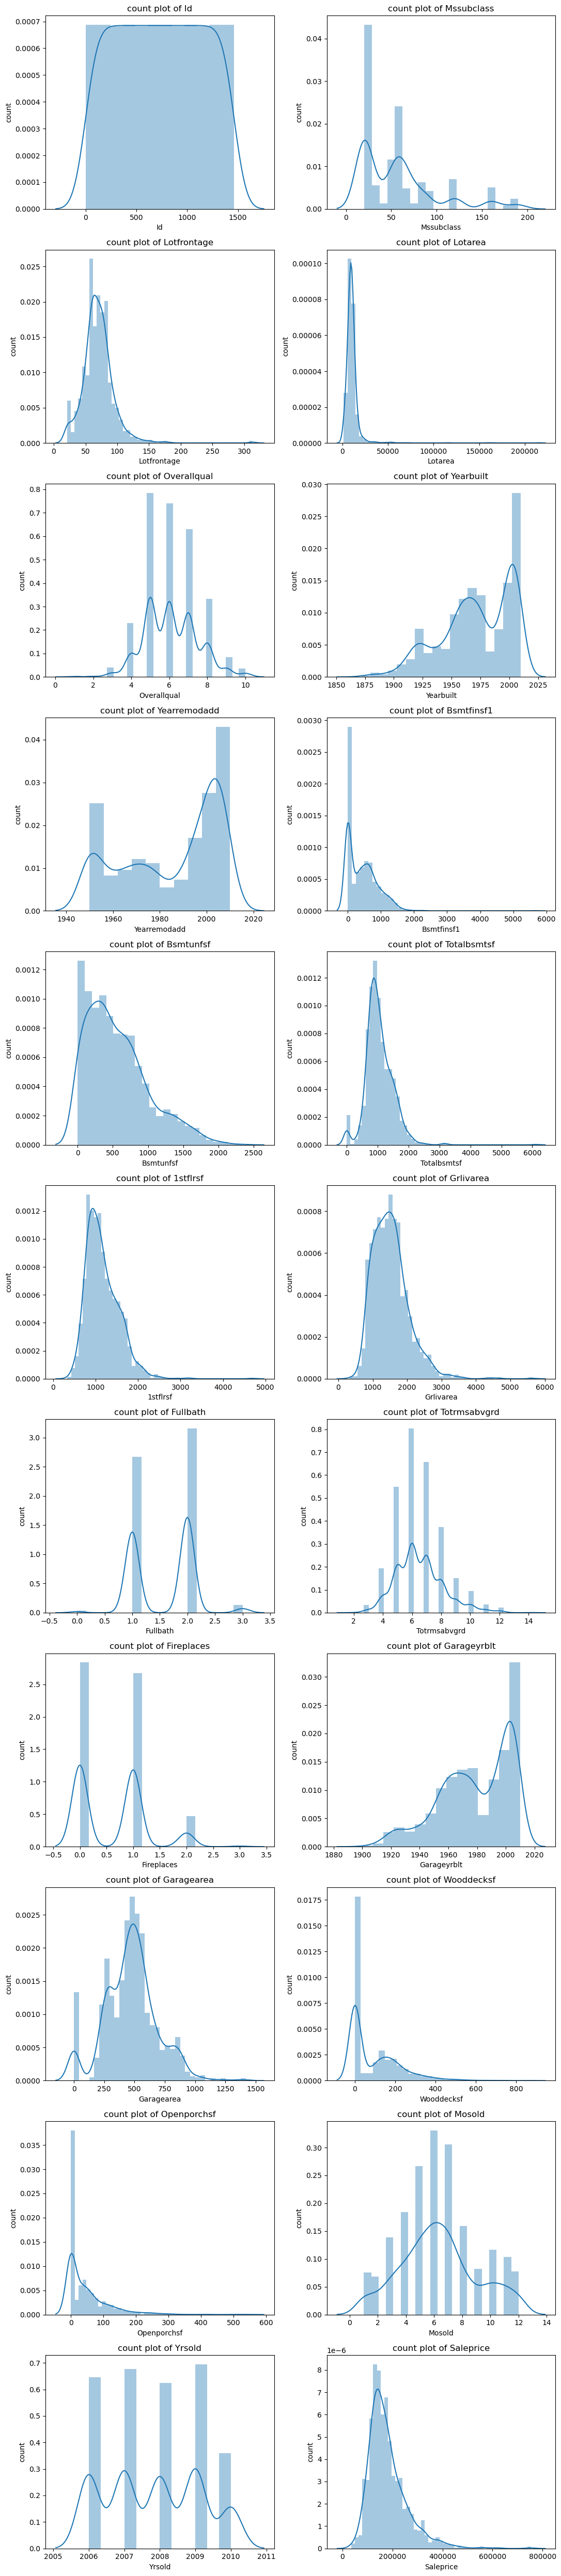

In [7]:
numeric = df.select_dtypes(include = [float, int])

fig, axes = plt.subplots(11, 2, figsize = (11, 50))

axes = axes.flatten()

for i, col in enumerate(numeric):
    sns.distplot(df[col], ax=axes[i])
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("count")
    axes[i].set_title(f"count plot of {col.capitalize()}")

plt.tight_layout()
plt.show()

### Observation 

1. The column "Id" contains unique values for each row, indicating that it serves as a unique identifier for the dataset. Since it does not provide any meaningful information for analysis, it is recommended to delete this column to avoid potential redundancy and unnecessary computational overhead.
2. The columns "MSSubClass," "OverallQual," "FullBath," "TotRmsAbvGrd," "Fireplaces," "Mosold," and "YrSold" are numeric in form; however, they represent categorical variables. The values within these columns are divided into distinct categories, suggesting that they should be treated as categorical variables during analysis to capture the categorical nature of the data accurately.

In [8]:
df = df.drop(["Id"], axis=1)

In [9]:
for feature in ["MSSubClass", "OverallQual", "FullBath", "TotRmsAbvGrd", "Fireplaces", "MoSold", "YrSold" ]:
    df[feature]=df[feature].astype('object')

### Plotting countplot for visualizing the count or frequency of occurrences of categorical variables.

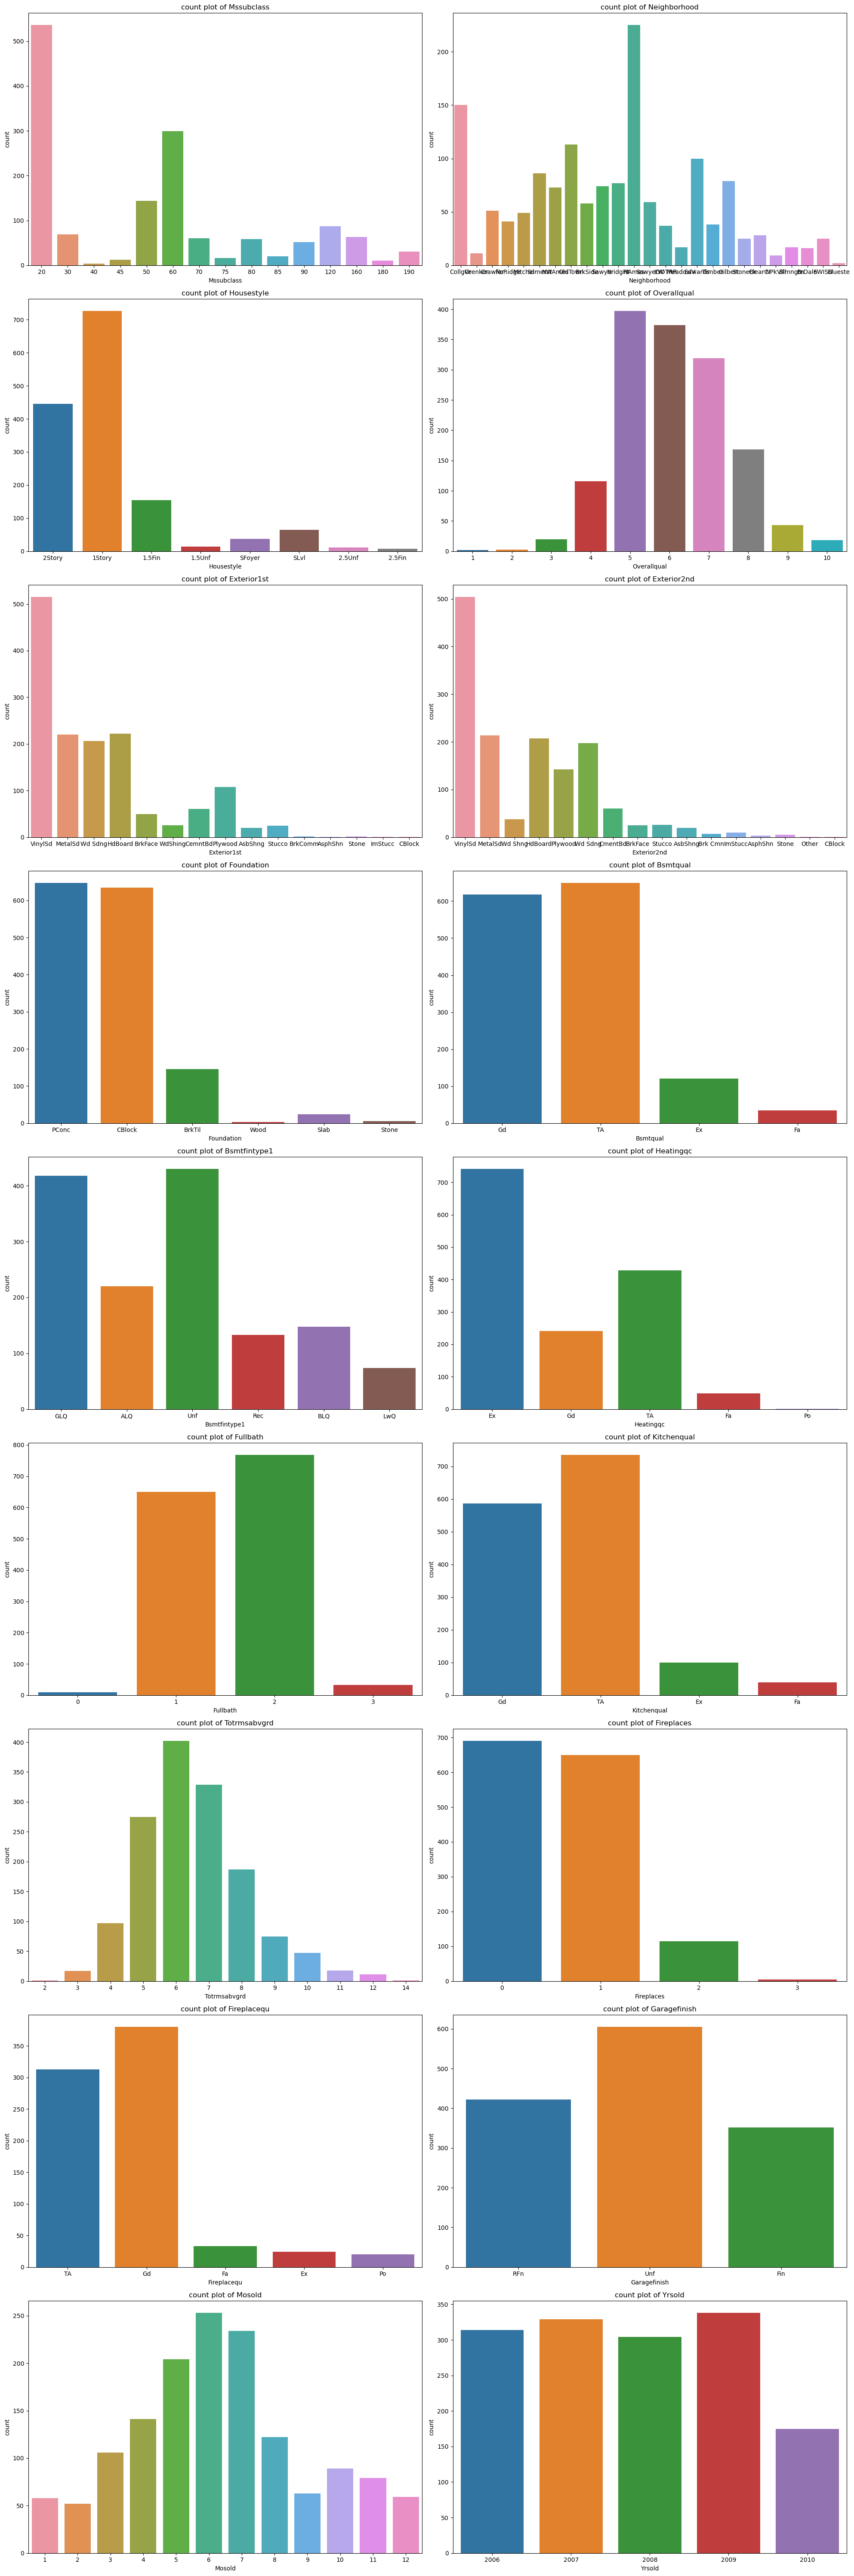

In [10]:
category = df.select_dtypes(include = [object])

fig, axes = plt.subplots(9, 2, figsize = (20, 60))

axes = axes.flatten()

for i, col in enumerate(category):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("count")
    axes[i].set_title(f"count plot of {col.capitalize()}")

plt.tight_layout()
plt.show()

### Comparative analysis: 
Calculating the building age and remodel age allows for comparisons between different buildings based on their construction years. We can examine how the age of buildings relates to other variables or analyze how building characteristics or conditions vary based on age.

In [11]:
import datetime as dt
current_year = int(dt.datetime.now().year)

In [12]:
building_age = current_year - df.YearBuilt
remodel_age = current_year - df.YearRemodAdd

In [13]:
df['Building_Age']=building_age
df['Remodeling_age']=remodel_age

### Outliers Treatment 

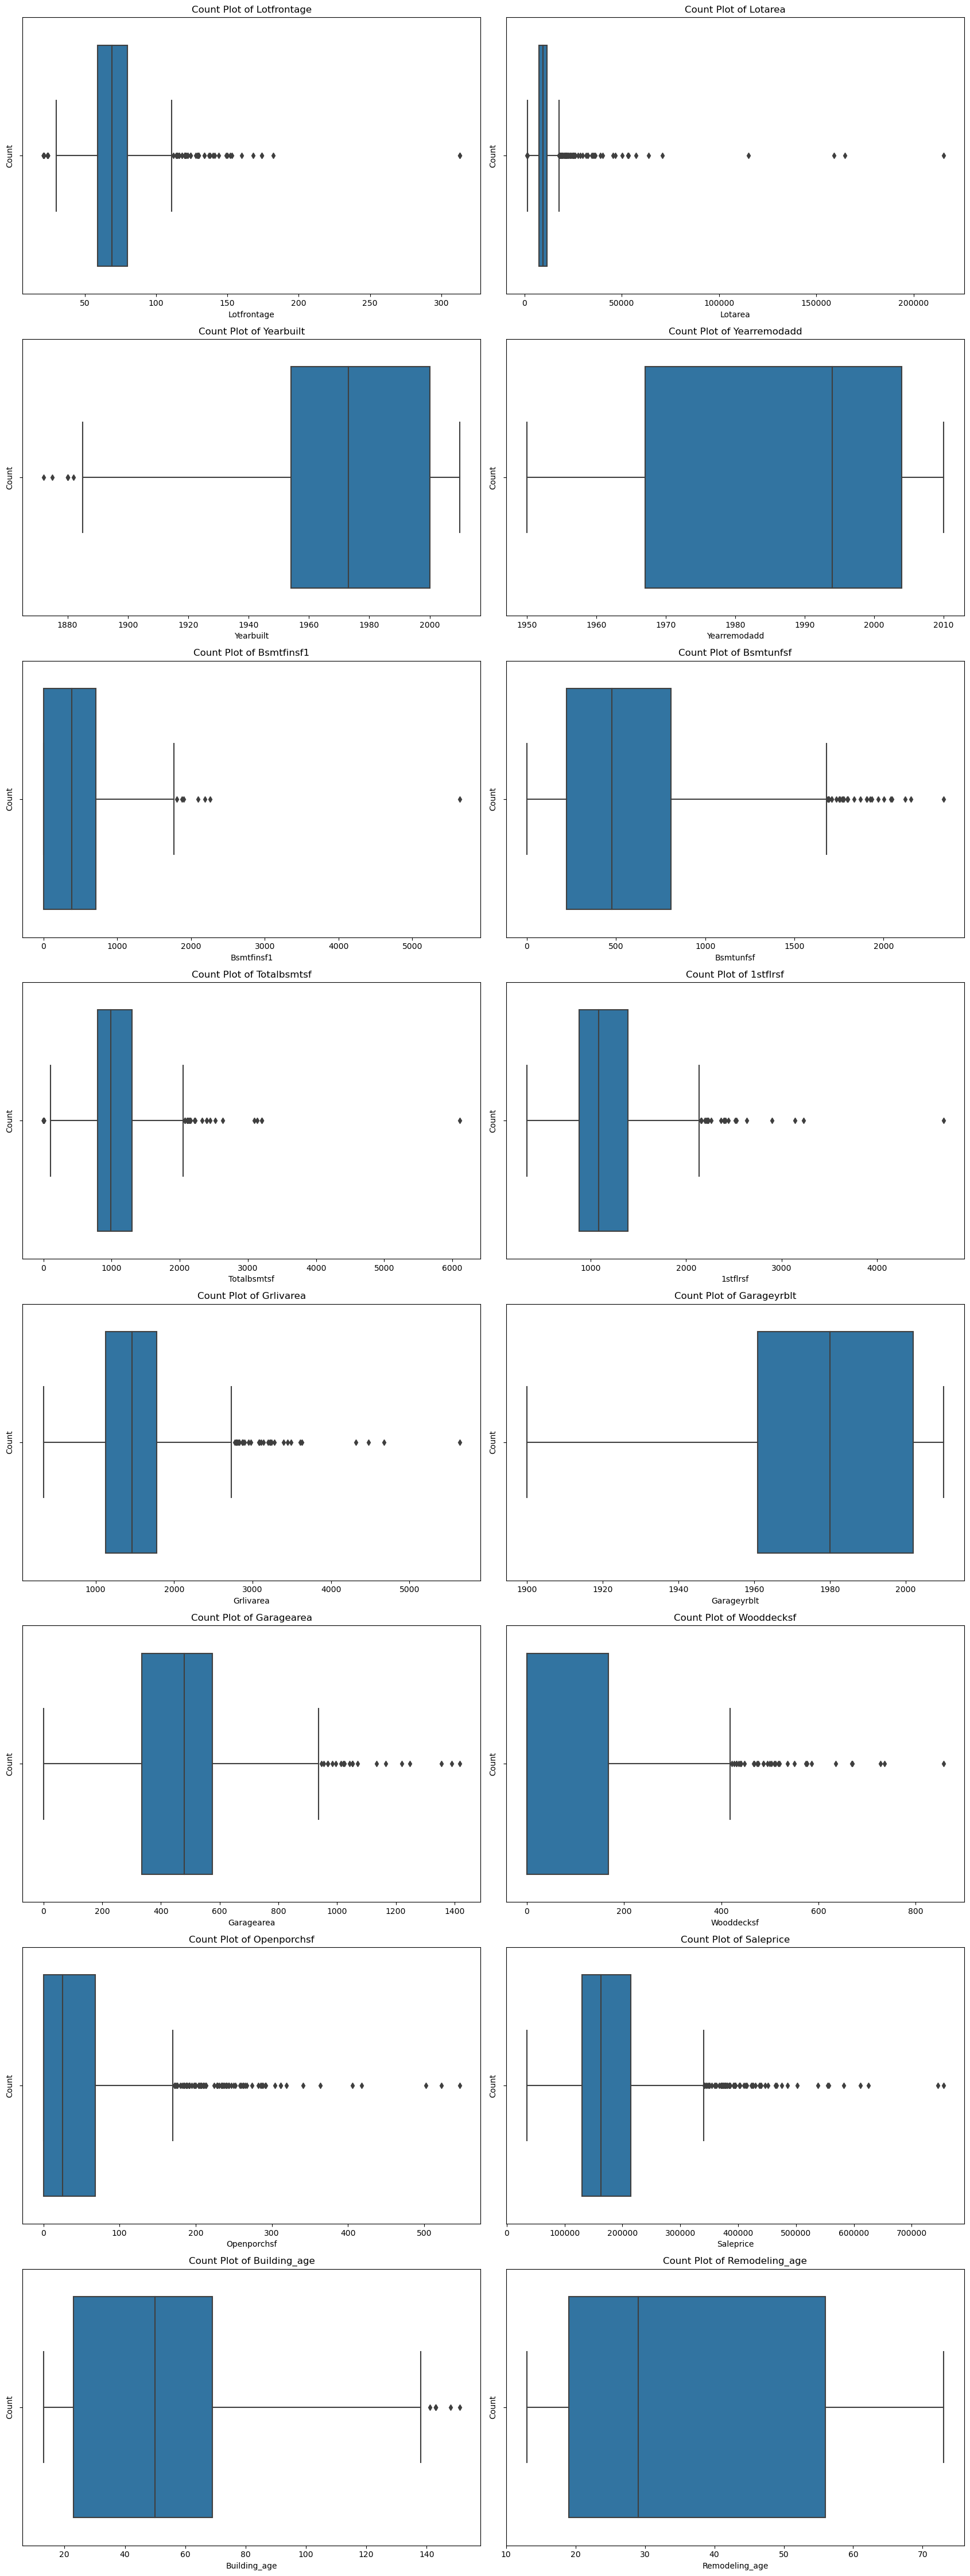

In [14]:
numeric = df.select_dtypes(include = [float, int])

fig, axes = plt.subplots(8, 2, figsize=(17, 45))

axes = axes.flatten()

for i, category in enumerate(numeric):
    sns.boxplot(x=category, data=df, ax=axes[i])
    axes[i].set_xlabel(category.capitalize())
    axes[i].set_ylabel("Count")
    axes[i].set_title(f"Count Plot of {category.capitalize()}")

plt.tight_layout()

plt.show()

In [15]:
numeric.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'Building_Age',
       'Remodeling_age'],
      dtype='object')

In [16]:
numeric = numeric.drop(["YearRemodAdd", "GarageYrBlt", "Remodeling_age", "SalePrice"], axis=1)

In [17]:
for col in numeric.columns:
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    Upper_limit = Q3 + 1.5*IQR
    Lower_limit = Q1 - 1.5*IQR
    
    df[col] = np.where(
    
        df[col] > Upper_limit,
        Upper_limit,

        np.where(
        
            df[col] < Lower_limit,
            Lower_limit,
    
            df[col]
        )
    )

### Dealing with Null Values 

Here we use mean for numerical and Mode for catogorical columns. 

In [18]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='mean')

columns_to_impute = ["LotFrontage", "GarageYrBlt"]
df[columns_to_impute] = si.fit_transform(df[columns_to_impute])

In [19]:
si = SimpleImputer(strategy='most_frequent')

columns_to_impute = ["BsmtQual", "BsmtFinType1", "FireplaceQu", "GarageFinish"]
df[columns_to_impute] = si.fit_transform(df[columns_to_impute])

### Creating Correlation Matrix to check relation of the dependend variable with each others.

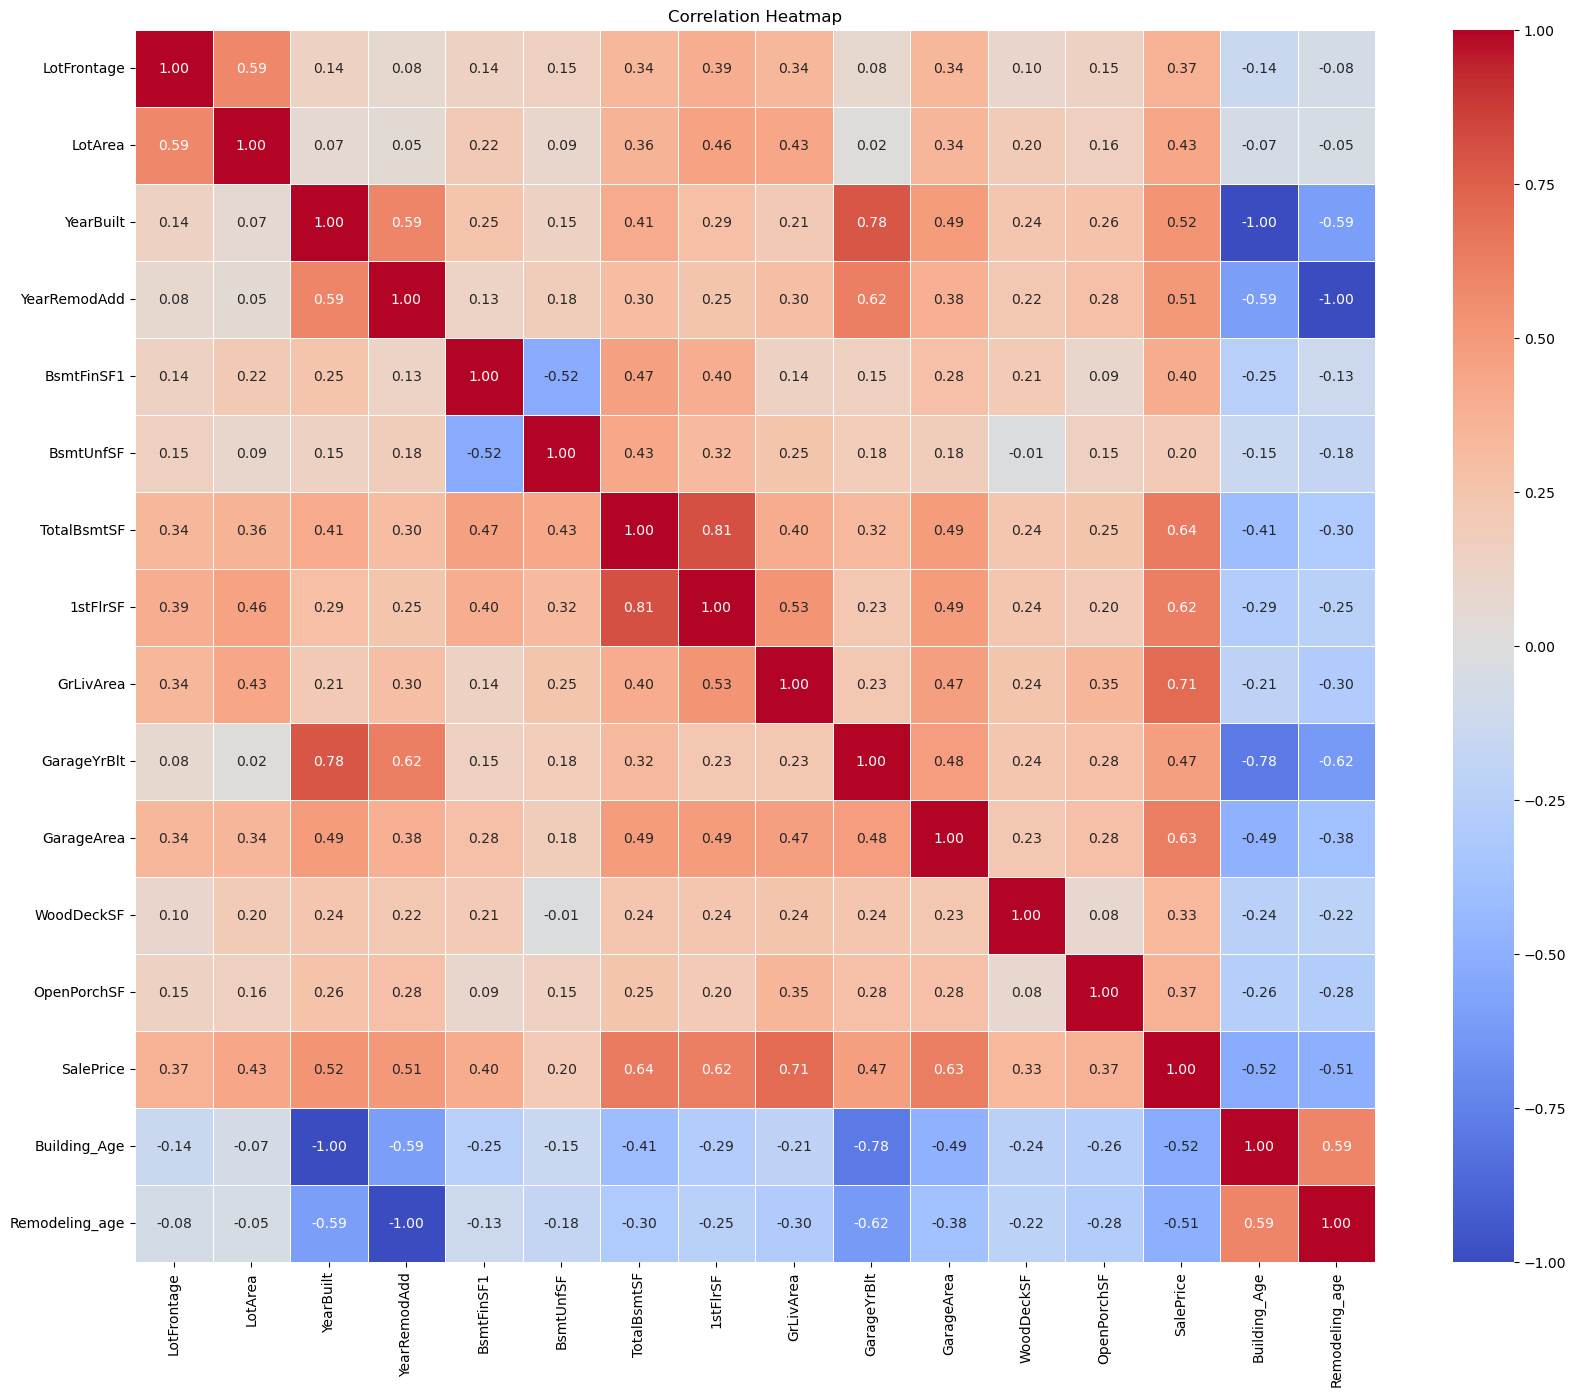

In [20]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 16))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax)
plt.title("Correlation Heatmap")
plt.show()

### Observation: 
The columns "YearBuilt" and "YearRemodAdd" show a strong negative correlation with the building age and remodeling, respectively. Based on this observation, it might be appropriate to consider removing these columns from the dataset as they may not provide significant predictive value or may introduce multicollinearity issues.

In [21]:
df = df.drop(["YearBuilt", "YearRemodAdd"], axis=1)

In [22]:
X = df.drop(["SalePrice"], axis=1)
y = df["SalePrice"]

### Encoding and Scalling 

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1460 non-null   object 
 1   LotFrontage     1460 non-null   float64
 2   LotArea         1460 non-null   float64
 3   Neighborhood    1460 non-null   object 
 4   HouseStyle      1460 non-null   object 
 5   OverallQual     1460 non-null   object 
 6   Exterior1st     1460 non-null   object 
 7   Exterior2nd     1460 non-null   object 
 8   Foundation      1460 non-null   object 
 9   BsmtQual        1460 non-null   object 
 10  BsmtFinType1    1460 non-null   object 
 11  BsmtFinSF1      1460 non-null   float64
 12  BsmtUnfSF       1460 non-null   float64
 13  TotalBsmtSF     1460 non-null   float64
 14  HeatingQC       1460 non-null   object 
 15  1stFlrSF        1460 non-null   float64
 16  GrLivArea       1460 non-null   float64
 17  FullBath        1460 non-null   o

### Observation:

1. Columns 1, 2, 11, 12, 13, 15, 16, 22, 24, 25, 26, 29, & 30: These columns are numerical in nature. However, due to the difference in value ranges between them, it is recommended to apply standard scaling to normalize the values.
2. Columns 3, 4, 6, 7, 8, 9, 10, 14, 18, 21 & 23: These columns are categorical in nature and have nominal data. Since they represent distinct categories without any inherent order or ranking, it is appropriate to use one-hot encoding for these columns.
3. Columns 0, 5, 17, 19, 20, 27, & 28: These columns are also categorical but have ordinal data. Ordinal data represents categories with a specific order or ranking. In this case, it is recommended to use ordinal encoding. 

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

trf1 = ColumnTransformer([
    ('OHE', OneHotEncoder(sparse=False, handle_unknown='ignore', drop = 'first'), [3, 4, 6, 7, 8, 9, 10, 14, 18, 21, 23]),
    ('OE', OrdinalEncoder(), [0, 5, 17, 19, 20, 27, 28]),
    ('StandardScaler', StandardScaler(), [1, 2, 11, 12, 13, 15, 16, 22, 24, 25, 26, 29, 30])
], remainder='passthrough')

In [25]:
df_transformed = trf1.fit_transform(X)

### Calculating Eigen Value and Eigen Vector 

In [26]:
from numpy.linalg import eig
from sklearn.decomposition import PCA

covmat = np.cov(df_transformed.T)
eigen_value, eigen_vec = np.linalg.eig(covmat)

In [27]:
eigen_val=list(eigen_value)
eigen_val.sort(reverse=True)

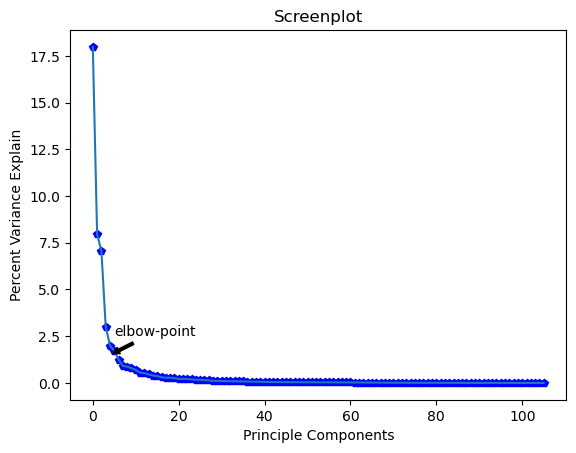

In [28]:
plt.plot(eigen_val, 'bp')
plt.plot(eigen_val)
plt.xlabel("Principle Components")
plt.ylabel("Percent Variance Explain")

plt.annotate(text = 'elbow-point', xy=(4,1.5), xytext = (5,2.5), arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))
plt.title('Screenplot')
plt.show()

### Observation: 

After calculating the eigenvalues and eigenvectors of the covariance matrix, it was found that a subset of 7 columns explains approximately 90% of the data variance. This implies that these 7 columns capture the most important information in the dataset.

In [29]:
eigen_vec = eigen_vec[:,:7]
eigen_vec

array([[ 6.34431962e-04,  3.17457374e-04, -1.52029629e-04,
        -5.86663085e-04, -2.29308637e-04,  5.17478560e-04,
        -3.58148159e-04],
       [ 5.04577436e-03,  3.81839930e-03, -2.10905954e-03,
        -2.45191057e-03,  1.62434929e-03, -4.84936063e-04,
        -6.60340270e-04],
       [-1.29197396e-03,  1.22869203e-02, -9.90990654e-03,
         7.43019511e-03,  1.24517154e-02, -1.95632604e-03,
         7.16469894e-03],
       [-3.21360731e-04, -2.01397335e-03,  7.40758959e-05,
         6.68675507e-03, -1.14817622e-02, -1.48453118e-03,
        -6.49927096e-04],
       [-7.44262492e-03, -1.22215069e-02,  1.41331958e-02,
        -5.08574059e-02,  2.92649575e-02,  1.81355129e-03,
        -3.06643957e-02],
       [ 6.43304521e-04, -1.12271230e-03, -2.86898516e-03,
         2.01398514e-02, -5.51285932e-03, -5.29359016e-03,
         6.99753229e-03],
       [-4.66412327e-04,  1.56753769e-02, -6.10952829e-03,
         9.04790259e-03, -4.79250452e-04,  2.80645845e-03,
        -3.8123921

In [30]:
df_pcs = pd.DataFrame(df_transformed.dot(eigen_vec), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
df_pcs

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,5.540408,-5.446259,3.069120,1.022446,0.886901,2.607463,-2.399876
1,0.120510,-5.670526,-0.674143,1.481724,-1.434997,1.432050,-0.445589
2,5.395907,-9.327663,-2.716556,0.142021,0.494163,3.047850,-1.446533
3,6.372405,-3.894236,1.542099,3.222206,1.268177,0.578381,-0.518120
4,5.314493,-13.570447,-3.328007,2.257943,-0.139861,3.421169,-1.885334
...,...,...,...,...,...,...,...
1455,5.507291,-8.222361,-2.464188,1.251751,2.430938,2.287670,-0.759191
1456,-0.159484,-5.351593,3.120920,3.047723,-2.179291,4.139999,0.988252
1457,6.387185,-6.948128,0.508706,4.462620,0.796662,5.029298,0.052689
1458,0.162832,-2.956611,-1.157870,1.307844,-0.746518,4.585491,-0.547550


In [31]:
pca = PCA(n_components = 7, random_state=0)
Principal_components = pca.fit_transform(df_transformed)

pca_df = pd.DataFrame(data =Principal_components, columns =   ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1.152195,1.032527,4.696625,-0.867415,-0.655916,-0.001778,-2.253654
1,-4.267704,0.808260,0.953363,-0.408137,1.665983,1.173634,-0.299381
2,1.007694,-2.848878,-1.089051,-1.747840,-0.263177,-0.442165,-1.300311
3,1.984192,2.584550,3.169604,1.332346,-1.037192,2.027304,-0.371934
4,0.926280,-7.091661,-1.700502,0.368083,0.370847,-0.815484,-1.739113


In [32]:
X = pca_df.values
X

array([[ 1.15219467e+00,  1.03252701e+00,  4.69662514e+00, ...,
        -6.55915571e-01, -1.77786335e-03, -2.25365365e+00],
       [-4.26770389e+00,  8.08259653e-01,  9.53362551e-01, ...,
         1.66598263e+00,  1.17363447e+00, -2.99381107e-01],
       [ 1.00769372e+00, -2.84887776e+00, -1.08905141e+00, ...,
        -2.63177469e-01, -4.42165079e-01, -1.30031130e+00],
       ...,
       [ 1.99897135e+00, -4.69342783e-01,  2.13621137e+00, ...,
        -5.65675311e-01, -2.42361309e+00,  1.98927096e-01],
       [-4.22538110e+00,  3.52217463e+00,  4.69634878e-01, ...,
         9.77505103e-01, -1.97980718e+00, -4.01323097e-01],
       [-4.32576414e+00,  1.29227405e+00, -5.68999181e-01, ...,
         1.97270340e+00,  7.97390512e-02, -5.21567960e-01]])

### Linear Regression Model Fitting

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [64]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = regressor.predict(X_test)
print("Predicted Prices:", y_pred)

Predicted Prices: [200121.54329842 205620.91720029 106589.90308591 180774.34561998
 278529.6461854  283585.57631861 250208.84655277  96801.53840711
 203286.97222811 140285.27772507 162443.86871722 192847.97242703
 266283.28307457  86546.20752158 211660.56535076 195996.54630843
 291811.67107118 149313.89276902 202800.42691458 195967.16829331
 362485.98734604 109780.40765609 122796.87739216 103017.74172746
 194668.88571931 175605.38991118 132403.02100303  88845.01709226
 142081.13089284 198094.2820354   82533.18750117 138389.07530052
 122058.42310653 103712.90157859 148414.11006472  53703.42218181
 130385.59131621 220780.71891267 293330.02080721 164118.97985784
 210402.70043191 109366.27110606 118707.18486688 155697.66237642
 236655.07835333 233779.3921773  254711.34433925 134288.91121241
 123500.06222489 141001.11579803 200608.46645511   1518.05683656
 186140.98173765 132042.41634684 221589.78143004 133225.28341184
 216983.08997212 204385.17388694 123660.23899697 134708.74097287
 130582

In [66]:
y_test

854     170000
381     187750
816     137000
577     164500
35      309000
         ...  
708     179540
1404    105000
151     372402
1184    186700
514      96500
Name: SalePrice, Length: 365, dtype: int64

In [67]:
regressor.score(X_test, y_test)

0.807359644718525

### Observation:

After fitting a linear regression model to the data, the obtained testing score is 80%. This indicates that the model achieves an accuracy of 80% in predicting the target variable

In [68]:
from sklearn.model_selection import cross_val_score

cross_val_score(regressor,X, y, cv=5)

array([0.80412729, 0.81827066, 0.77970239, 0.77745469, 0.71669384])

### Fitting OLS Model

In [69]:
import statsmodels.api as sm

X_train_ols = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_ols)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     532.5
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:04:30   Log-Likelihood:                -13091.
No. Observations:                1095   AIC:                         2.620e+04
Df Residuals:                    1087   BIC:                         2.624e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.804e+05   1142.574    157.853      0.0

### Conclusion:

After fitting both a linear regression model and an Ordinary Least Squares (OLS) model to the data, we obtained testing scores of 80% and 77% respectively. These scores provide insights into the performance of the models in predicting the target variable.

The linear regression model achieved a testing score of 80%, indicating that it has a reasonably good predictive ability. This means that the model can explain 80% of the variance in the target variable using the available features.

On the other hand, the OLS model achieved a testing score of 77%. While slightly lower than the linear regression model, it still demonstrates a significant ability to predict the target variable accurately.

Comparing the two models, the linear regression model outperforms the OLS model in terms of the testing score, suggesting that it provides a better fit to the data.